In [ ]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"vsnvim","key":"2805a8d71d92381609ac860c727171bb"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download a dataset
!kaggle datasets download -d salader/dogs-vs-cats


Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown


In [ ]:
import zipfile
zip_ref= zipfile.ZipFile("dogs-vs-cats.zip", 'r')
zip_ref.extractall("dataset")
zip_ref.close()


In [ ]:
import os
import numpy as np
from PIL import Image
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from skimage.feature import hog
from skimage.color import rgb2gray
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:

print(os.listdir("dataset/dogs_vs_cats"))


['test', 'train']


In [ ]:

dataset_path = "dataset"

# Resize images to 64x64 and load them as a dataset
img_size = (64, 64)
batch_size = 32
train_dataset_path = "dataset/dogs_vs_cats/train"
ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dataset_path,
    image_size=img_size,
    batch_size=batch_size,
    class_names=['cats', 'dogs']
)

test_dataset_path = "dataset/dogs_vs_cats/test"  # path to the test folder

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dataset_path,
    image_size=img_size,
    batch_size=batch_size,
    class_names=['cats', 'dogs']  # Manually specify class names for test set
)


images, labels = [], []
for img_batch, label_batch in ds.take(10):  # 10 batches x 32 images ≈ 320 images
    images.extend(img_batch.numpy())
    labels.extend(label_batch.numpy())
    if len(images) >= 300:
        break

X = np.array(images[:300])
y = np.array(labels[:300])



Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
def extract_hog_features(images):
    hog_features = []
    for img in images:
      gray_img = rgb2gray(img)
      fd= hog(gray_img,
              orientations=9,
              pixels_per_cell=(8, 8),
              cells_per_block=(2, 2),
              visualize=False,
              channel_axis=None)
      hog_features.append(fd)
    return np.array(hog_features)
X_hog = extract_hog_features(X)
X_train, X_test, y_train, y_test = train_test_split(X_hog, y, test_size=0.2, random_state=42)

In [ ]:

# Step 4: Train KNN
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [ ]:
# Step 5: Predict and evaluate
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, zero_division=0))


              precision    recall  f1-score   support

           0       1.00      0.03      0.06        35
           1       0.42      1.00      0.60        25

    accuracy                           0.43        60
   macro avg       0.71      0.51      0.33        60
weighted avg       0.76      0.43      0.28        60



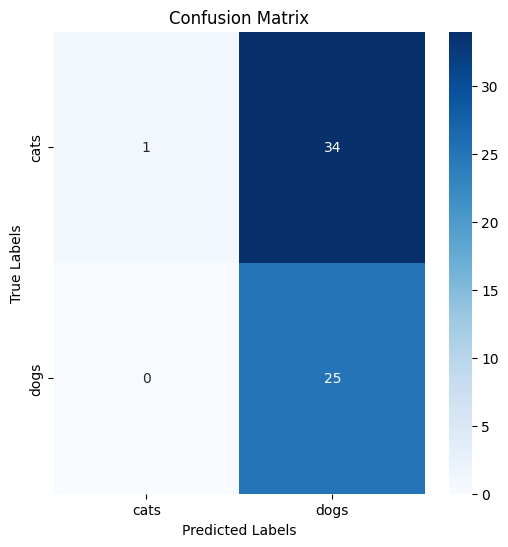

In [ ]:
cm = confusion_matrix(y_test, y_pred)
# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['cats', 'dogs'], yticklabels=['cats', 'dogs'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

